## Problems:
* 'days_employed' sanirim borclandigi gün sayisi. onu tarihe cevirmek istedim fakat yapamadim: su sekilde denedim:
    df["days_employed"] = df["days_employed"].astype('datetime')

* elimizdeki data bir seri mi yoksa DataFrame mi?

* 'Conclusion' kismina tam olarak ne gibi not aliyoruz. bir örnek yazarmisin?

### <font color='blue'>Response:</font>
- ´days_employed´ kac gun o kisinin chalishmish oldugunu gostermesi gerekir normalde. ama data'da sorun oldugu icin o net bi sekilde degil. Bizim cevaplamamiz gereken sorularin hic birisi o sutun'la ilgili olmadigi icin, aslinda o sutunu drop edebiliriz. Ama ish hayatindaki dogru olan yaklashim: nasil bir sorun var, sorunun nedeni ne olabilir, eger o sorunu kendimiz halledebildiysek (mesele o sutundaki veriler gun degilde dakika falan olsa kendimiz gune cevirebiliriz ve o sutunu drop etmemize gerek yok) nasil halettik, tum bunlari not edip, bize data'yi veren elemana bildirmemiz lazim. Cunku database ayarlarinda sorun olabilir, onlarin bunu duzeltmesi lazim! (Bu sutundaki verileri 'datetime' ceviremezsin, ama baska 'datetime'verisi olan sutunu cevirmek istediginde pandas'in [to_datetime function'i](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime) onu kullanman lazim.
- Dataframe: hem sutunu hem satiri olan veri diyebiliriz (bildigimiz bir table dataframe'dir). Bu dataframe'in tek bir sutununa seri diyebiliriz. Mesela `df['debt']`diye alip bunun data type'na bakarsan `pandas Series`yazar. sadece `df` data type'na bakarsan `pandas dataframe`yazar.
- Conlusion kismina neler yazabilcegin ve baskada bir kac tane tavsiye/sorun ashagida ekledim!

## Open the data file and have a look at the general information.

In [24]:
import pandas as pd; import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("credit_scoring_eng.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [27]:
df.shape

(21525, 12)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,401755.400475
dob_years,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19351.0,26787.568355,16475.450632,3306.762000,16488.504500,23202.870000,32549.611000,362496.645000


### Conclusion

> ### <font color='orange'>Tavsiye: </font> Bu "conclusion" kisimlarinda yukarda yaptiklarinla neleri kesfettin, onlari kisaca ozetleyebilirsin. Mesela: data kac satir ve sutundan olushuyor (atiyorum: data engineer sana 22000 satiri ve 13 sutunu olan data verdim diyor. ama senin elinde 21525 satir ve 12 sutun var. Veya senin patronlarin ne kadar datayla ishe bashladigini bilmek istiyour), nasil hatalari buldun simdiye kadar (missing values varmi, hangi sutunda hac tane missing var, duplicates varmi. bunun gibi neler kesfettinse onlari yaziya dokmeyi tavsiye ederim. Yani su anlik onemsiz seyler gibi duruyor ama eminim boyle yaziya dokerken kendi bu terimleri kullanma becerilerinde artacak ve ileride calistigin yerde patronlar data'dan pandas'tan anlamadiklari durumunda illa ki yapman gerekecek!

## Data preprocessing

### Processing missing values

In [29]:
df.isnull().values.any()

True

In [30]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

> ### <font color='orange'>Tavsiye: </font> Data uzerine degisiklikler yaptiginda, ozellikle data'ya yeni bi seyler eklediysen (missing value filling, drop_duplicates) bunlari saglam bir argumanla aciklaman gerekir! Yani missing olarak duruyordu onlari drop ettim veya einfach mean'le doldurdum demek cok ikna edici olmaz!

In [31]:
df.fillna(df.mean(), inplace=True)

In [32]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Conclusion



### Data type replacement

In [33]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [35]:
df["total_income"] = df["total_income"].astype('int')

In [43]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int64
purpose              object
dtype: object

### Conclusion


### Processing duplicates

In [52]:
df.duplicated().sum()

54

In [58]:
df.drop_duplicates(inplace = True)

In [59]:
df.shape

(21471, 12)

### Conclusion



### Categorizing Data

>### <font color='orange'>Tavsiye: </font> Gelirlerine gore kateorilere ayirabilirsin burda (yani dusuk, orta, yuksek diye 3 kategori olabilir, 4-5'de yapabilirsin).

### Conclusion


## Answer these questions
- Is there a connection between having kids and repaying a loan on time?
- Is there a connection between marital status and repaying a loan on time?
- Is there a connection between income level and repaying a loan on time?
- How do different loan purposes affect on-time loan repayment?

>### <font color='orange'>Tavsiye: </font> Her soruyu yaparken ayri bi bashlik altinda yapabilirsin!

In [65]:
dfc = df[["children","debt"]]
dfc

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0
...,...,...
21520,1,0
21521,0,0
21522,1,1
21523,3,1


>### <font color='red'>Sorun: </font> -1 tane cocuk, veya 20 tane cocuk olan kisiler var, onlar gayet normal mi? yoksa hata falan olabilir mi? Eger hataysa nasil duzeltebiliriz?

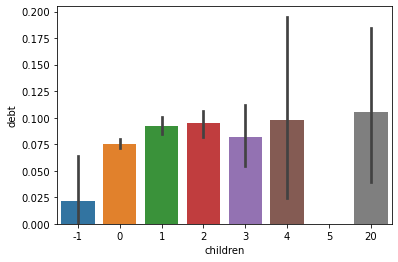

In [67]:
sns.barplot(x = "children", y = "debt", data = dfc);

>### <font color='red'>Sorun: </font> Tum graphs icin gecerli: 1) plot_title eklenmesi lazim; 2) x and y axis label eklenmesi lazim; 3) kissadan hisse seklinde bir iki cumleyle graph'da neler gorebiliyorsun/ onu nasil yorumlarsin eklebeilir!

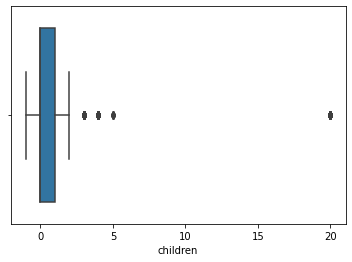

In [74]:
sns.boxplot(x="children", hue="debt", data=dfc);

/Users/huseyintunc/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


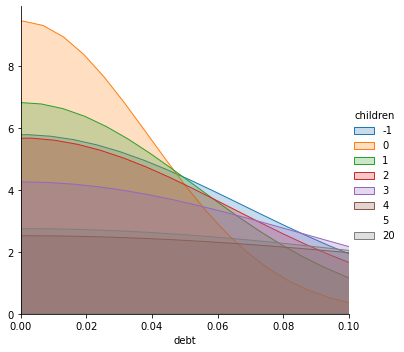

In [73]:
(sns
 .FacetGrid(df,
            hue = "children",
            height = 5,
            xlim = (0,0.1))
 .map(sns.kdeplot,"debt", shade = True)
 .add_legend()
 );

>### <font color='green'>Guzel: </font> Bu graphí cok sevdim. Fakat, yukarida dedigim gibi -1 ve 20 falan duzeltildikten sonra x ve y oklarinin ne anlama geldigi, ve gorselden nasil bir sonuc cikardigimizi yazarsan super olur!

In [63]:
df.groupby(["children","debt"]).count()

days_employed  dob_years  education  education_id  \
children debt                                                      
-1       0                46         46         46            46   
         1                 1          1          1             1   
 0       0             13044      13044      13044         13044   
         1              1063       1063       1063          1063   
 1       0              4365       4365       4365          4365   
         1               444        444        444           444   
 2       0              1858       1858       1858          1858   
         1               194        194        194           194   
 3       0               303        303        303           303   
         1                27         27         27            27   
 4       0                37         37         37            37   
         1                 4          4          4             4   
 5       0                 9          9          9             9   
 20      0                68         68         68            68   
         1                 8          8          8             8   

               family_status  family_status_id  gender  income_type  \
children debt                                                         
-1       0                46                46      46           46   
         1                 1                 1       1            1   
 0       0             13044             13044   13044        13044   
         1              1063              1063    1063         1063   
 1       0              4365              4365    4365         4365   
         1               444               444     444          444   
 2       0              1858              1858    1858         1858   
         1               194               194     194          194   
 3       0               303               303     303          303   
         1                27                27      27           27   
 4       0                37                37      37           37   
         1                 4                 4       4            4   
 5       0                 9                 9       9            9   
 20      0                68                68      68           68   
         1                 8                 8       8            8   

               total_income  purpose  
children debt                         
-1       0               46       46  
         1                1        1  
 0       0            13044    13044  
         1             1063     1063  
 1       0             4365     4365  
         1              444      444  
 2       0             1858     1858  
         1              194      194  
 3       0              303      303  
         1               27       27  
 4       0               37       37  
         1                4        4  
 5       0                9        9  
 20      0               68       68  
         1                8        8

### Conclusion


## SUMMARY


## Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x] file open;
- [ ] file examined;
- [ ] missing values defined;
- [ ] missing values are filled;
- [ ] an explanation of which missing value types were detected;
- [ ] explanation for the possible causes of missing values;
- [ ] an explanation of how the blanks are filled;
- [ ] replaced the real data type with an integer;
- [ ] an explanation of which method is used to change the data type and why;
- [ ] duplicates deleted;
- [ ] an explanation of which method is used to find and remove duplicates;
- [ ] description of the possible reasons for the appearance of duplicates in the data;
- [ ] data is categorized;
- [ ] an explanation of the principle of data categorization;
- [ ] an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ] an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ] an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ] an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ] conclusions are present on each stage;
- [ ] a general conclusion is made.